In [1]:
import numpy as np 
import pandas as pd

# для нормализации, стандартизации
from sklearn import preprocessing

# Для графиков
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
matplotlib.style.use('ggplot')

# Введение
Мы будем работать с датасетом, в котором содержатся сведения о 515 000 отзывов на отели Европы. Модель, которую мы будем обучать, должна предсказывать рейтинг отеля по данным сайта Booking на основе имеющихся в датасете данных. 

In [2]:
# Файлы входных данных доступны для чтения в  "../input/" директории
# Например, при запуске этого параметра (нажатием кнопки «Выполнить» или «Shift+Enter») будут перечислены все файлы во входном каталоге.

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/sf-booking/hotels_test.csv
/kaggle/input/sf-booking/hotels_train.csv
/kaggle/input/sf-booking/submission.csv


In [3]:
# всегда фиксируйте RANDOM_SEED, чтобы аши эксперименты были воспроизводимы!
RANDOM_SEED = 42

In [4]:
# зафиксируем версию пакетов, чтобы эксперименты были воспроизводимы:
!pip freeze > requirements.txt

In [5]:
# Подгрузим наши данные из соревнования

DATA_DIR = '/kaggle/input/sf-booking/'
df_train = pd.read_csv(DATA_DIR+'/hotels_train.csv') # датасет для обучения
df_test = pd.read_csv(DATA_DIR+'hotels_test.csv') # датасет для предсказания
sample_submission = pd.read_csv(DATA_DIR+'/submission.csv') # самбмишн

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386803 entries, 0 to 386802
Data columns (total 17 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               386803 non-null  object 
 1   additional_number_of_scoring                386803 non-null  int64  
 2   review_date                                 386803 non-null  object 
 3   average_score                               386803 non-null  float64
 4   hotel_name                                  386803 non-null  object 
 5   reviewer_nationality                        386803 non-null  object 
 6   negative_review                             386803 non-null  object 
 7   review_total_negative_word_counts           386803 non-null  int64  
 8   total_number_of_reviews                     386803 non-null  int64  
 9   positive_review                             386803 non-null  object 
 

In [7]:
df_train.head(2)

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,tags,days_since_review,lat,lng
0,Stratton Street Mayfair Westminster Borough Lo...,581,2/19/2016,8.4,The May Fair Hotel,United Kingdom,Leaving,3,1994,Staff were amazing,4,7,10.0,"[' Leisure trip ', ' Couple ', ' Studio Suite ...",531 day,51.507894,-0.143671
1,130 134 Southampton Row Camden London WC1B 5AF...,299,1/12/2017,8.3,Mercure London Bloomsbury Hotel,United Kingdom,poor breakfast,3,1361,location,2,14,6.3,"[' Business trip ', ' Couple ', ' Standard Dou...",203 day,51.521009,-0.123097


In [8]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128935 entries, 0 to 128934
Data columns (total 16 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               128935 non-null  object 
 1   additional_number_of_scoring                128935 non-null  int64  
 2   review_date                                 128935 non-null  object 
 3   average_score                               128935 non-null  float64
 4   hotel_name                                  128935 non-null  object 
 5   reviewer_nationality                        128935 non-null  object 
 6   negative_review                             128935 non-null  object 
 7   review_total_negative_word_counts           128935 non-null  int64  
 8   total_number_of_reviews                     128935 non-null  int64  
 9   positive_review                             128935 non-null  object 
 

In [9]:
df_test.head(2)


,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,tags,days_since_review,lat,lng
0,Via Senigallia 6 20161 Milan Italy,904,7/21/2017,8.1,Hotel Da Vinci,United Kingdom,Would have appreciated a shop in the hotel th...,52,16670,Hotel was great clean friendly staff free bre...,62,1,"[' Leisure trip ', ' Couple ', ' Double Room '...",13 days,45.533137,9.171102
1,Arlandaweg 10 Westpoort 1043 EW Amsterdam Neth...,612,12/12/2016,8.6,Urban Lodge Hotel,Belgium,No tissue paper box was present at the room,10,5018,No Positive,0,7,"[' Leisure trip ', ' Group ', ' Triple Room ',...",234 day,52.385649,4.834443


In [10]:
sample_submission.head(2)

,reviewer_score,id
0,1,488440
1,10,274649


In [11]:
sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128935 entries, 0 to 128934
Data columns (total 2 columns):
 #   Column          Non-Null Count   Dtype
---  ------          --------------   -----
 0   reviewer_score  128935 non-null  int64
 1   id              128935 non-null  int64
dtypes: int64(2)
memory usage: 2.0 MB


In [12]:
# ВАЖНО! дря корректной обработки признаков объединяем трейн и тест в один датасет
df_train['sample'] = 1 # помечаем где у нас трейн
df_test['sample'] = 0 # помечаем где у нас тест
df_test['reviewer_score'] = 0 # в тесте у нас нет значения reviewer_score, мы его должны предсказать, по этому пока просто заполняем нулями

hotels = df_test.append(df_train, sort=False).reset_index(drop=True) # объединяем

In [13]:
hotels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 18 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               515738 non-null  object 
 1   additional_number_of_scoring                515738 non-null  int64  
 2   review_date                                 515738 non-null  object 
 3   average_score                               515738 non-null  float64
 4   hotel_name                                  515738 non-null  object 
 5   reviewer_nationality                        515738 non-null  object 
 6   negative_review                             515738 non-null  object 
 7   review_total_negative_word_counts           515738 non-null  int64  
 8   total_number_of_reviews                     515738 non-null  int64  
 9   positive_review                             515738 non-null  object 
 

Первоначальная версия датасета содержит 17 полей со следующей информацией:

    * hotel_address — адрес отеля;
    * review_date — дата, когда рецензент разместил соответствующий отзыв;
    * average_score — средний балл отеля, рассчитанный на основе последнего комментария за последний год;
    * hotel_name — название отеля;
    * reviewer_nationality — страна рецензента;
    * negative_review — отрицательный отзыв, который рецензент дал отелю;
    * review_total_negative_word_counts — общее количество слов в отрицательном отзыв;
    * positive_review — положительный отзыв, который рецензент дал отелю;
    * review_total_positive_word_counts — общее количество слов в положительном отзыве.
    * reviewer_score — оценка, которую рецензент поставил отелю на основе своего опыта;
    * total_number_of_reviews_reviewer_has_given — количество отзывов, которые рецензенты дали в прошлом;
    * total_number_of_reviews — общее количество действительных отзывов об отеле;
    * tags — теги, которые рецензент дал отелю;
    * days_since_review — количество дней между датой проверки и датой очистки;
    * additional_number_of_scoring — есть также некоторые гости, которые просто поставили оценку сервису, но не оставили отзыв. Это число указывает, сколько там действительных оценок без проверки.
    * lat — географическая широта отеля;
    * lng — географическая долгота отеля.



In [14]:
#посмотрим типы данных и количество ненулевых значений
hotels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 18 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               515738 non-null  object 
 1   additional_number_of_scoring                515738 non-null  int64  
 2   review_date                                 515738 non-null  object 
 3   average_score                               515738 non-null  float64
 4   hotel_name                                  515738 non-null  object 
 5   reviewer_nationality                        515738 non-null  object 
 6   negative_review                             515738 non-null  object 
 7   review_total_negative_word_counts           515738 non-null  int64  
 8   total_number_of_reviews                     515738 non-null  int64  
 9   positive_review                             515738 non-null  object 
 

In [15]:
mask_lat = hotels['lat'].notnull()
mask_lng = hotels['lng'].notnull()
# посмотрим на количество строк, где нет хотя бы одного значения широты или долготы
print(hotels[mask_lat | mask_lng].shape)
# посмотрим на количество строк, где нет обоих значений и широты и долготы
print(hotels[mask_lat & mask_lng].shape)

(512470, 18)
(512470, 18)


## Вывод: ## 
    * Количество строк одинаково, значит речь идет об одних и тех же строках. Эти данные вносит менеджер отеля при описании объекта на платформе Booking.

>Нулевые значения есть только у признаков координат. 
Учитывая что они по сути дублируют адрес, заменим их на медианные значения, ведь по сути это категориальные признаки написанные цифами. 
На моду или среднее заменять нелогично, это может сильно повлиять на предсказание итогового рейтинга. 
Что значит мода? 
Отель, на который оставили более всего отзывов. 
Может он просто самый большой по количеству или работа с клиентами в плане отзывов ведётся наилучшим образом.
И что? Мы его координаты отдадим в предсказывающую модель? 
В данных учреждениях менеджер по работе с Booking не может найти время, чтобы поставить красный маркер на карту в месте, где находится отель и ему отдать потенциал получить рейтинг высокоменеджерированного отеля. 
Нет, я не согласен. 
Заменять на среднее совсем не логично, ведь это координаты. 
Ну будет модель считать, что данные объекты находятся где-нибудь посреди чистого поля и что? 
Вряд ли это поможет предсказать рейтинг отеля. 
Тогда уж можно просто нули поставить, тоже самое. 
Если же исходить из того, что координаты непроставлены по каким-то имым причинам? 
Может отель не делает ставку на путешественников, добирающихся откуда-то. 
Может он находится в людном месте и наполняется естественнным трафиком. 
На вокзале или на дороге. 
Поэтому, решаю отдать им координаты медианного отеля, где-то в центре Европы. 

In [16]:
values = {
    'lat': hotels['lat'].median(),
    'lng': hotels['lng'].median()
}
#заполняем пропуски в соответствии с заявленным словарем
hotels = hotels.fillna(values)
#выводим результирующую долю пропусков
hotels.isnull().mean()

hotel_address                                 0.0
additional_number_of_scoring                  0.0
review_date                                   0.0
average_score                                 0.0
hotel_name                                    0.0
reviewer_nationality                          0.0
negative_review                               0.0
review_total_negative_word_counts             0.0
total_number_of_reviews                       0.0
positive_review                               0.0
review_total_positive_word_counts             0.0
total_number_of_reviews_reviewer_has_given    0.0
tags                                          0.0
days_since_review                             0.0
lat                                           0.0
lng                                           0.0
sample                                        0.0
reviewer_score                                0.0
dtype: float64

# Работа с выбросами #


In [17]:
#Какие типы данных есть в нашем датасете
hotels.dtypes.value_counts()

object     8
int64      6
float64    4
dtype: int64

In [18]:
#создадим список числовых столбцов
num_columns = hotels.select_dtypes(include=['float64','int64'])

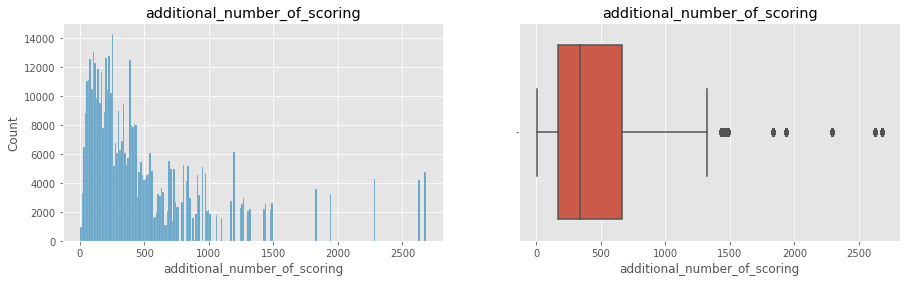

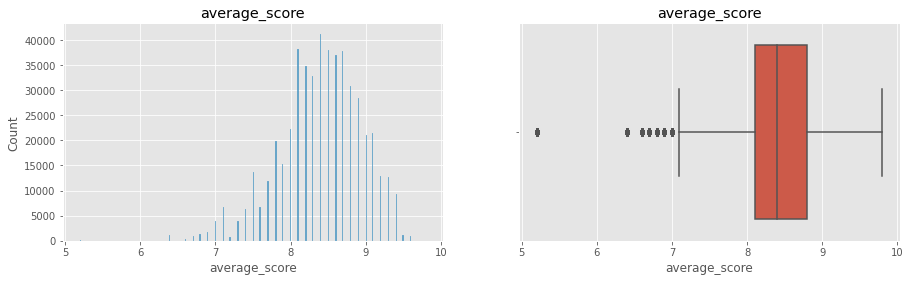

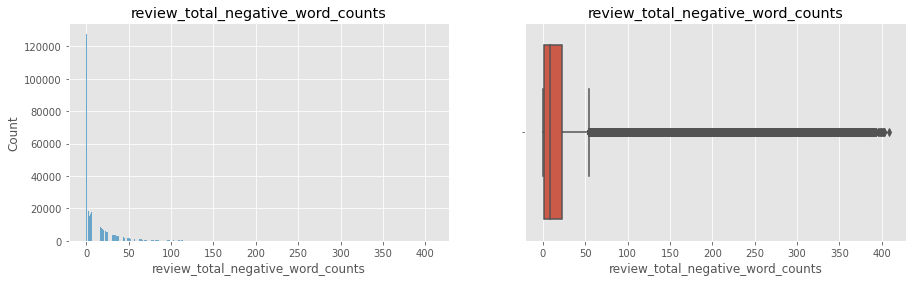

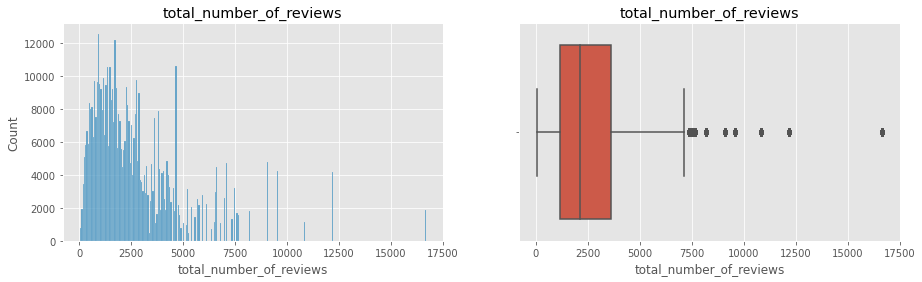

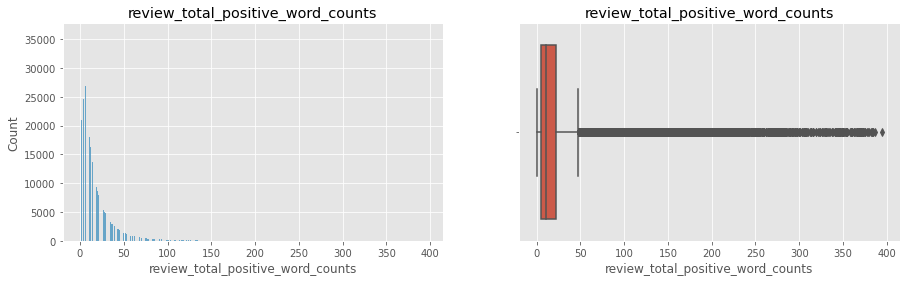

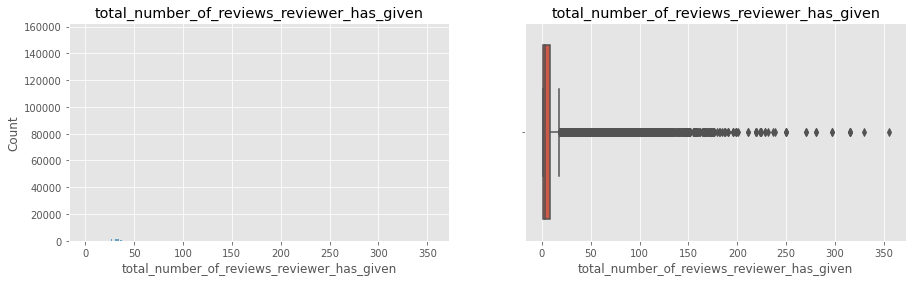

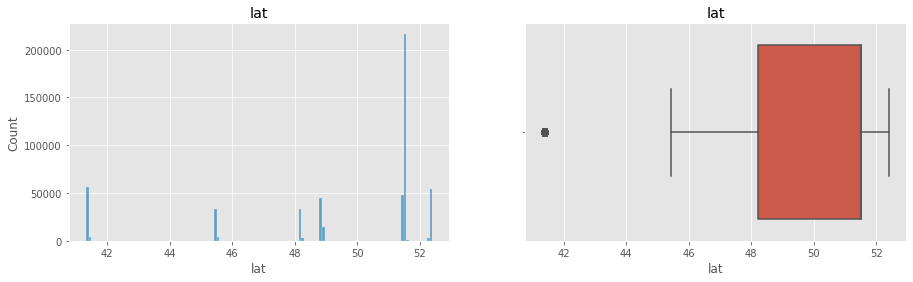

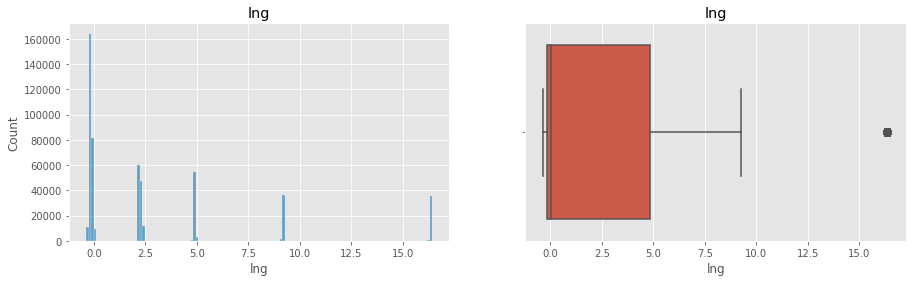

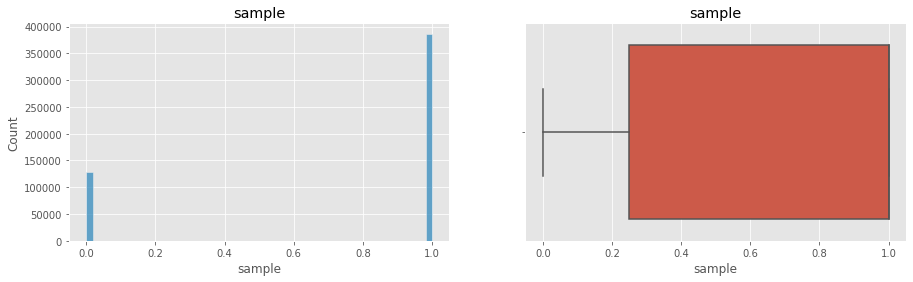

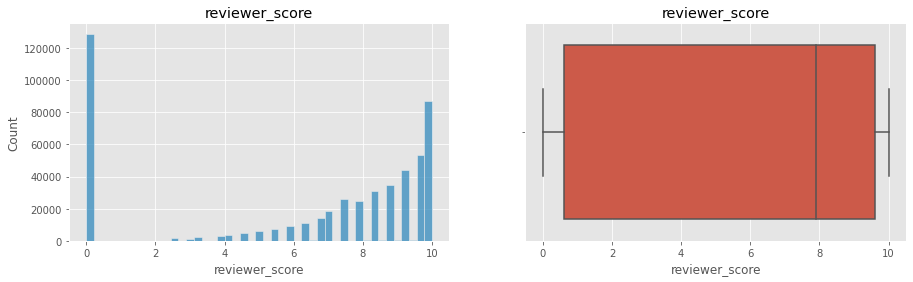

In [19]:
#построим гистограмму и boxplot для каждого числового признака
for _ in num_columns:
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
    histplot = sns.histplot(data=hotels, x=_, ax=axes[0]);
    histplot.set_title(_);
    boxplot = sns.boxplot(data=hotels, x=_, ax=axes[1]);
    boxplot.set_title(_);

Формально выбросы есть. Но суть выбросов это ошибки в данных. В данном датасете видно большой разброс в данных. Т.к. этот датасет формировался на основе стандартных процедур и заполнения стандартных форм, то шанс получения ошибок минимален. Но тем не менее проверим пару наиболее подозрительных значений

In [20]:
hotels.describe()

,additional_number_of_scoring,average_score,review_total_negative_word_counts,total_number_of_reviews,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,lat,lng,sample,reviewer_score
count,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000
mean,498.081836,8.397487,18.539450,2743.743944,17.776458,7.166001,49.455477,2.805977,0.749999,6.297672
std,500.538467,0.548048,29.690831,2317.464868,21.804185,11.040228,3.459181,4.570348,0.433014,3.902295
min,1.000000,5.200000,0.000000,43.000000,0.000000,1.000000,41.328376,-0.369758,0.000000,0.000000
25%,169.000000,8.100000,2.000000,1161.000000,5.000000,1.000000,48.214662,-0.143372,0.250000,0.625000
50%,341.000000,8.400000,9.000000,2134.000000,11.000000,3.000000,51.499981,0.010607,1.000000,7.900000
75%,660.000000,8.800000,23.000000,3613.000000,22.000000,8.000000,51.516288,4.831098,1.000000,9.600000
max,2682.000000,9.800000,408.000000,16670.000000,395.000000,355.000000,52.400181,16.429233,1.000000,10.000000


Подозрение вызывает "total_number_of_reviews_reviewer_has_given" cо значением 355 отзывов. 
Или это бот, который строчит отзывы, а может просто активно путешествующий гражданин. 


In [21]:
#возьмем выборку оценок отеля у гостей, написавших более 200 отзывов
mask = hotels['total_number_of_reviews_reviewer_has_given'] > 200
average_more_reviewer_score, reviewer_score_mor_average = 0,0
for raw in hotels[mask].index:
    if hotels.iloc[raw]['average_score'] >  hotels.iloc[raw]['reviewer_score']:
        average_more_reviewer_score += 1
    else:
        reviewer_score_mor_average += 1
print(f'Оценка гостя выше средней {reviewer_score_mor_average}\nОценка гостя ниже средней {average_more_reviewer_score}')

Оценка гостя выше средней 11
Оценка гостя ниже средней 21


Судя по данным большинство гостей написавших более 200 отзывов дали оценку ниже средней, т.е. ботами, пишущими фейковые отзывы  явно не являются, поэтому однозначно большое количество отзывов не является "мусорными ботами'

Также в признаке 'total_number_of_reviews' максимальное значение 16670 высоковато по сравнению с 75%-ой медианой. Посмотрим, что это за объект такой?

In [22]:
hotels[hotels['total_number_of_reviews'] == 16670].head(1)

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,tags,days_since_review,lat,lng,sample,reviewer_score
0,Via Senigallia 6 20161 Milan Italy,904,7/21/2017,8.1,Hotel Da Vinci,United Kingdom,Would have appreciated a shop in the hotel th...,52,16670,Hotel was great clean friendly staff free bre...,62,1,"[' Leisure trip ', ' Couple ', ' Double Room '...",13 days,45.533137,9.171102,0,0.0


In [23]:
hotels[hotels['total_number_of_reviews'] == 16670].shape[0]

1877

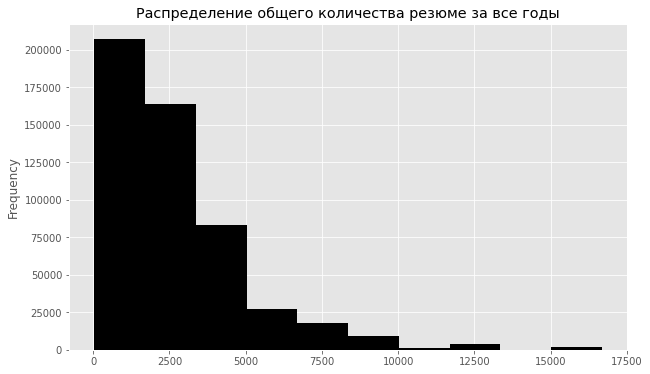

In [24]:
hotels['total_number_of_reviews'].plot(
    kind='hist',
    figsize=(10, 6),
    title='Распределение общего количества резюме за все годы',
    grid = True,
    color = 'black',
    bins=10
);

Это Hotel Da Vinci, Via Senigallia 6 20161 Milan Italy, 
в нашей базе за три года 1877 отзывов, а всего за все годы 16670, это 11,25% 
В абсолютных цифрах похоже на выброс. Исследуем.
Посмотрим как этот отель  в нашей базе по отзывам.
В лидерах или нет.

In [25]:
hotels['hotel_address'].value_counts().head(20).reset_index()

,index,hotel_address
0,163 Marsh Wall Docklands Tower Hamlets London ...,4789
1,372 Strand Westminster Borough London WC2R 0JJ...,4256
2,Westminster Bridge Road Lambeth London SE1 7UT...,4169
3,Scarsdale Place Kensington Kensington and Chel...,3578
4,7 Pepys Street City of London London EC3N 4AF ...,3212
5,1 Inverness Terrace Westminster Borough London...,2958
6,Wrights Lane Kensington and Chelsea London W8 ...,2768
7,225 Edgware Road Westminster Borough London W2...,2628
8,4 18 Harrington Gardens Kensington and Chelsea...,2565
9,1 Waterview Drive Greenwich London SE10 0TW Un...,2551


In [26]:
hotels['hotel_address'].unique().shape[0]

1493

> 20 место из 1493, вполне себе лидер списка. 
Посмотрим на соотношение отзывов за все годы и за годы, которые в нашем датасете.

In [27]:
vc = hotels['total_number_of_reviews'].value_counts()
corr_rew = pd.DataFrame(vc)
corr_rew = corr_rew.reset_index()
corr_rew['corr']=round((corr_rew['total_number_of_reviews']/corr_rew['index']*100),2)
corr_rew.sort_values(by=['corr'],ascending=True).head()

,index,total_number_of_reviews,corr
1138,207,12,5.80
1015,1197,71,5.93
933,1785,109,6.11
1012,1107,73,6.59
1011,1088,73,6.71


In [28]:
corr_rew.describe()

,index,total_number_of_reviews,corr
count,1142.000000,1142.000000,1142.000000
mean,1490.231173,451.609457,34.359825
std,1492.494907,487.629777,20.896231
min,43.000000,10.000000,5.800000
25%,504.000000,145.250000,18.392500
50%,1043.000000,307.500000,28.390000
75%,1955.750000,568.750000,45.107500
max,16670.000000,4789.000000,131.740000


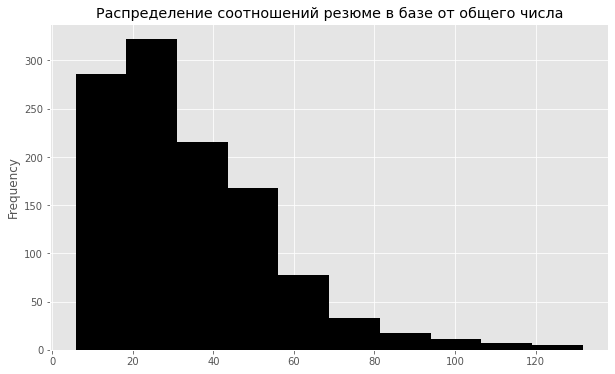

In [29]:
corr_rew['corr'].plot(
    kind='hist',
    figsize=(10, 6),
    title='Распределение соотношений резюме в базе от общего числа',
    grid = True,
    color = 'black',
    bins=10
);

Данные по соотношению резюме по интересующему нас отелю, не аномальны. 11,25% это между 25% медианой и минимумом.  Вывод, 16670 это не выброс.

# Далее посмотрим на дубликаты #

In [30]:
dupl_columns = list(hotels.columns)

mask = hotels.duplicated(subset=dupl_columns)
sber_duplicates = hotels[mask]
print(f'Число найденных дубликатов: {sber_duplicates.shape[0]}')

Число найденных дубликатов: 336


> 0.07% от общего числа строк. 
Удалять не буду. 
Во-первых, сама база отзывов Booking.com формируется автоматически. 
Строка в датасет вносится даже если человек просто поставил оценку и не стал писать ничего. 
И если, к примеру два человека с одинаковой нулевой историей впервые приехали в отель и поставили одинаковую оценку это будет равная запись. 
Т.е. по форме дубликат, но по сути нет. 
Во-вторых, удалять дубликаты конкретно в этом случае не рекомендовал ментор. 

# Поищем неинформативные признаки #

In [31]:
#список неинформативных признаков
low_information_cols = [] 

#цикл по всем столбцам
for col in hotels.columns:
    #наибольшая относительная частота в признаке
    top_freq = hotels[col].value_counts(normalize=True).max()
    #доля уникальных значений от размера признака
    nunique_ratio = hotels[col].nunique() / hotels[col].count()
    # сравниваем наибольшую частоту с порогом 95%
    if top_freq > 0.95:
        low_information_cols.append(col)
        print(f'{col}: {round(top_freq*100, 2)}% одинаковых значений')
    # сравниваем долю уникальных значений с порогом
    if nunique_ratio > 0.95:
        low_information_cols.append(col)
        print(f'{col}: {round(nunique_ratio*100, 2)}% уникальных значений')

In [32]:
print(top_freq, nunique_ratio)

0.2500009694845057 7.368082243309587e-05


## Вывод: ##
    * Неинформативных признаков не найдено

# Перейдем к преобразованию категориальных признаков. 

>Начнём с даты размещения отзыва.
Сама по себе дата ничего не дает. 
Но можно выделить день недели и признак того, праздничный день или нет.
Почему? Мой опыт работы в гостиничной сфере, как в премиальных, так и сетевых отелей показывает, что туристы в будние дни это в основном бизнес-туристы, командировочные. 
Эти тратить энергию на написание отзывов как правило не собираются. 
Приехал, поспал, уехал, забыл. 
Только если уж совсем что-то неприятное было, могут возбудиться. 
Другое дело, туристы - отдыхающие. 
Выходной день или праздник, повышенные ожидания, положительный настрой, такие и на чай дадут и отзыв напишут в благодарность. 
Поэтому, я взял общеевропейские праздники: Новый Год, Рождество, День труда и День окончания второй мировой войны. 
Конечно, было бы интересно взять праздники по странам, но это задача для дальнейших экспериментов.

In [33]:
#загрузим библиотеку для работы с регулярными выражениями
import re

In [34]:
#Приведём формат даты к datetime, чтобы привести даты в разных форматах(12/12/2014, 12.12.2014) к одному формату 
hotels['review_date'] = pd.to_datetime(hotels['review_date'])

In [35]:
#с помощью регулярного выражения создадим бинарный признак 'celebrate'
celeb = ['-01-01','-01-02','-05-01','-05-02','-12-25','-12-26','-12-27']
hotels['celebrate'] = hotels['review_date'].astype('string').apply(lambda x:1 if re.search(r'(-\d{1,2}-\d{1,2})', x).group(0) in celeb else 0)

In [36]:
hotels['celebrate'].value_counts()

0    507750
1      7988
Name: celebrate, dtype: int64

Получился неинформативный признак. 99,98% нулей. :-( Что ж, добавим выходных: сб и вс

In [37]:
#для начала создадим признак дня недели
hotels['dayofweek'] = pd.to_datetime(hotels['review_date']).dt.dayofweek.apply(lambda x: 1 if x in [5,6] else 0)
#затем преобразуем его в бинарный (будни, выходные) и добавим к ним праздники из 'celebrate'
hotels['holidays_and_celebrates'] = hotels['dayofweek']+hotels['celebrate']
# и теперь пересечения приведём к значению 1
hotels['holidays_and_celebrates'] = hotels['holidays_and_celebrates'].apply(lambda x: 1 if x in [1,2] else 0)
#посмотрим, что получилось
hotels['holidays_and_celebrates'].value_counts()

0    375106
1    140632
Name: holidays_and_celebrates, dtype: int64

Так уже лучше. Признак бинарный, нормализации и стандартизации не требуется.

In [38]:
#Удалим промежуточные признаки
hotels = hotels.drop(['review_date','dayofweek','celebrate'],axis = 1)

# Преобразуем признак 'tags'

Будем исходить из того, что чем больше тегов человек поставил в отзыве, тем лучше он относится к предприятию в целом.

In [39]:
hotels['tags'] = hotels['tags'].apply(lambda x: len(x.split(',')))

# Следующий признак 'days_since_review'

In [40]:
#приведём признак к числовому формату 
hotels['days_since_review'] = hotels['days_since_review'].apply(lambda x: x.split(' ')[0])
hotels['days_since_review'] = hotels['days_since_review'].astype('int16')

#  Признак 'hotel_address'

In [41]:
#извлечём из признака 'hotel_address'  страну
hotels['country'] = hotels['hotel_address'].apply(lambda x: x.split(' ')[-1]).apply(lambda y:'United Kingdom' if y == 'Kingdom' else y)

In [42]:
#извлечём из признака 'hotel_address' город
hotels['town'] = hotels['hotel_address'].apply(lambda x: x.split(' ')[-2] if x.split(' ')[-1] != 'Kingdom' else x.split(' ')[-5])

In [43]:
#удалим ненужный признак 
hotels = hotels.drop('hotel_address', axis = 1)

In [44]:
#сразу закодируем этот признак. Это типичный непорядковый категориальный признак. 
#Т.е порядковое кодирование не подходит. Для бинарного кодирования маловато признаков.
hotels = pd.get_dummies(hotels, columns = ['country'])

# признак 'reviewer_nationality'

In [45]:
#225 уникальных значений. Рекомендуется бинарное кодирование.
len(hotels['reviewer_nationality'].unique())

227

In [46]:
#импорт для работы с кодировщиком
import category_encoders as ce

In [47]:
#кодируем методом BinaryEncoder
bin_encoder = ce.BinaryEncoder(cols = ['reviewer_nationality'])
type_bin = bin_encoder.fit_transform(hotels['reviewer_nationality'])
hotels = pd.concat([hotels, type_bin], axis = 1)
hotels = hotels.drop(['reviewer_nationality'], axis = 1)

# признак 'hotel_name'

In [48]:
#1492 уникальных значения. Рекомендуется бинарное кодирование.
len(hotels['hotel_name'].unique())

1492

In [49]:
bin_encoder = ce.BinaryEncoder(cols = ['hotel_name'])
type_bin = bin_encoder.fit_transform(hotels['hotel_name'])
hotels = pd.concat([hotels, type_bin], axis = 1)
hotels = hotels.drop(['hotel_name'], axis = 1)

# признаки 'review_total_positive_word_counts' и 'review_total_negative_word_counts'

Следующие признаки это общее количество слов в позитивном и отрицательном отзывах. Нам важна разница, а не абсолютное число слов. 
Предлагаю создать признак, в котором будет положительная или отрицательная разница между словами в отзывах.

In [50]:
hotels['delta_review'] = hotels['review_total_positive_word_counts'] - hotels['review_total_negative_word_counts']

In [51]:
#удалим ненужные признаки
hotels = hotels.drop(['review_total_positive_word_counts', 'review_total_negative_word_counts'], axis = 1)

# Признаки 'lng' , 'lat'

Следующие признаки это географические координаты. 
Моя идея состоит в том, чтобы разделить отели на категории по удаленности их от центра городов. 
Есть предположение, что это влияет на сервис и на итоговую оценку.

In [52]:
#установим нужную библиотеку folium
!pip install folium

In [53]:
#установим нужную библиотеку для загрузки координат городов
!pip install geopandas

In [54]:
#Importing the requires modules
import folium
from geopandas.tools import geocode
 
#Creating a DataFrame
wonders = ['London', 'Barcelona','Paris','Amsterdam','Vienna','Milan']
 
df = pd.DataFrame({'wonders' : wonders})
 

/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


In [55]:
#function to unzip latitude and longitude from GeoDataFrame
def custom_geocoder(address):
    dataframe = geocode(address , provider="nominatim" , user_agent = 'my_request')
    point = dataframe.geometry.iloc[0]
    return pd.Series({'Latitude': point.y, 'Longitude': point.x})


In [56]:
!pip install geopy

In [57]:
import geopy.geocoders

In [58]:
#Applying function to the dataframe
df[['latitude' , 'longitude']]= df.wonders.apply(lambda x: custom_geocoder(x))

In [59]:
#загрузим библиотеку для расчёта расстояния по координатам
!pip install haversine

In [60]:
from haversine import haversine, Unit

In [61]:
df.head()

,wonders,latitude,longitude
0,London,51.507322,-0.127647
1,Barcelona,41.382894,2.177432
2,Paris,48.858890,2.320041
3,Amsterdam,52.372760,4.893604
4,Vienna,48.208354,16.372504


In [62]:
#переименуем столбцы для объединения
df.rename(columns = {'wonders':'town',
                     'latitude':'latitude_town',
                     'longitude':'longitude_town'}, inplace=True)
hotels.rename(columns = {'lat':'latitude_hotel',
                         'lng':'longitude_hotel'}, inplace=True)


In [63]:
#присоеденим таблицу с координатами городов к нашему датасету
hotels = hotels.merge(df, on = 'town')

In [64]:
#создадим признак 'distance_out_center'
hotels['distance_out_center'] = 0
_ = 0
while _ <= (hotels.shape[0]-1):
    latitude_town = hotels.loc[_,'latitude_town']
    longitude_town = hotels.loc[_,'longitude_town']
    latitude_hotel = hotels.loc[_,'latitude_hotel']
    longitude_hotel = hotels.loc[_,'longitude_hotel']
    town_center = (longitude_town, latitude_town)
    hotel_location = (longitude_hotel, latitude_hotel)
    distance_out_center = haversine(town_center, hotel_location)
    hotels.loc[_,'distance_out_center'] = round(distance_out_center)
    _+=1

In [65]:
#удаляем ненужные признаки
hotels = hotels.drop(['latitude_town', 'longitude_town', 'latitude_hotel', 'longitude_hotel'], axis = 1)

In [66]:
#преобразуем признак города 
hotels = pd.get_dummies(hotels, columns = ['town'])

# Признаки 'negative_review' и 'positive_review'

Это тексты. 
Будем их анализировать интерпретатором текста, который выявит количество позитивных,негативных, нейтральных слов.
Но по сути это один текст в разных колонках. Вначале соединим их в один признак.

In [67]:
hotels['review_sum'] = hotels['negative_review'] + hotels['positive_review']

In [68]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import time
nltk.downloader.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [69]:
#запустим анализатор текста
def review_score(review):
    Score ={}
    sent_analizer = SentimentIntensityAnalyzer()
    Score = sent_analizer.polarity_scores(review)
    return Score

In [70]:
hotels['review_sum'] = hotels['review_sum'].apply(review_score)

In [71]:
#получились словари с неоходимыми данными
hotels['review_sum'].head()

0    {'neg': 0.049, 'neu': 0.617, 'pos': 0.334, 'co...
1    {'neg': 0.149, 'neu': 0.529, 'pos': 0.322, 'co...
2    {'neg': 0.0, 'neu': 0.704, 'pos': 0.296, 'comp...
3    {'neg': 0.0, 'neu': 0.811, 'pos': 0.189, 'comp...
4    {'neg': 0.033, 'neu': 0.841, 'pos': 0.126, 'co...
Name: review_sum, dtype: object

In [72]:
#превратим словари из значений признака в отдельные признаки 'neg','neu','pos','compound'
pd.json_normalize(hotels['review_sum'])
hotels = hotels.drop(columns = 'review_sum').join(pd.json_normalize(hotels['review_sum']))

In [73]:
#удалим ненужные столбцы 
hotels = hotels.drop(columns = ['positive_review','negative_review'], axis = 1)

# Анализ и отбор признаков

Разделим признаки на группы:

In [74]:
#числовые признаки
num_cols = ['days_since_review', 
            'delta_review', 
            'distance_out_center', 
            'additional_number_of_scoring', 
            'total_number_of_reviews_reviewer_has_given', 
            'average_score',
            'total_number_of_reviews',
            'tags',
            'neg',
            'pos',
            'neu',
            'compound'
            ]
#категориальные признаки
cat_cols = ['holidays_and_celebrates',
            'country_Austria',
            'country_France',
            'country_Italy',
            'country_Netherlands',
            'country_Spain',
            'country_United Kingdom',
            'reviewer_nationality_0',
            'reviewer_nationality_1',
            'reviewer_nationality_2',
            'reviewer_nationality_3',
            'reviewer_nationality_4',
            'reviewer_nationality_5',
            'reviewer_nationality_6',
            'reviewer_nationality_7',
            'hotel_name_0',
            'hotel_name_1',
            'hotel_name_2',
            'hotel_name_3',
            'hotel_name_4',
            'hotel_name_5',
            'hotel_name_6',
            'hotel_name_7',
            'hotel_name_8',
            'hotel_name_9',
            'hotel_name_10',
            'town_Amsterdam',
            'town_Barcelona',
            'town_London',
            'town_Milan',
            'town_Paris',
            'town_Vienna'           
            ]

Определим нормальность распределения числовых признаков

In [75]:
hotels.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 515738 entries, 0 to 515737
Data columns (total 46 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   additional_number_of_scoring                515738 non-null  int64  
 1   average_score                               515738 non-null  float64
 2   total_number_of_reviews                     515738 non-null  int64  
 3   total_number_of_reviews_reviewer_has_given  515738 non-null  int64  
 4   tags                                        515738 non-null  int64  
 5   days_since_review                           515738 non-null  int16  
 6   sample                                      515738 non-null  int64  
 7   reviewer_score                              515738 non-null  float64
 8   holidays_and_celebrates                     515738 non-null  int64  
 9   country_Austria                             515738 non-null  uint8  
 

In [76]:
# создадим датасет для анализа числовых признаков

df = pd.DataFrame({ 
    # дней со времени создания отзыва
    'days_since_review': hotels['days_since_review'],
    # разница в количестве слов в негативных и позитивных признаках
    'delta_review': hotels['delta_review'],
    # расстояние от отеля до центра города
    'distance_out_center': hotels['distance_out_center'],
    # общее количество резюме
    'additional_number_of_scoring': hotels['additional_number_of_scoring'],
    # общее количество написанных отзывов гостем отеля
    'total_number_of_reviews_reviewer_has_given':  hotels['total_number_of_reviews_reviewer_has_given'],
    # средний балл отеля
    'average_score': hotels['average_score'],
    #общее количество отзывов отеля
    'total_number_of_reviews':  hotels['total_number_of_reviews'],
    #общее количество поставленных тегов
    'tags': hotels['tags'],
    #доля негативных слов в отзыве
    'neg': hotels['neg'],
    #доля позитивных слов в отзыве
    'neu': hotels['neu'],
    #доля нейтральных слов в отзыве
    'pos': hotels['pos'],
    #объединённый показатель соотношения позитивных и негативных слов в отзыве
    'compound': hotels['compound']
})

# Копируем названия столбцов, которые теряются при использовании fit_transform()
col_names = list(df.columns)

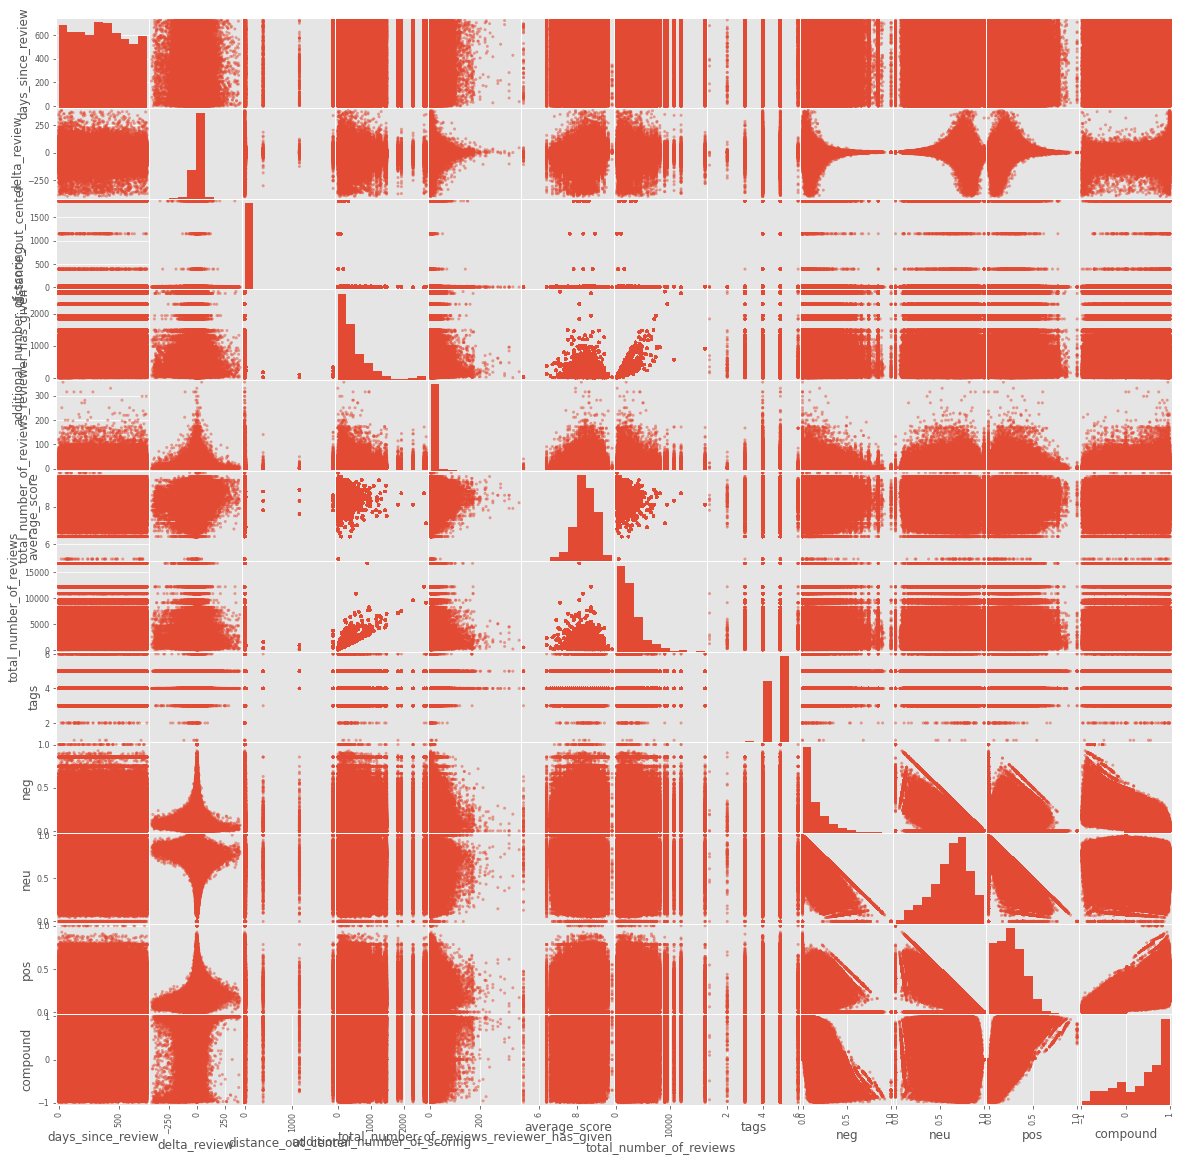

In [77]:
#визуализируем распределения признаков
df_for_visual = pd.DataFrame(hotels, columns=col_names)
pd.plotting.scatter_matrix(df_for_visual, alpha=0.5, figsize=(20,20));

Признак 'average_score' и 'neu' похожи на нормально распределённые. Подключим тест Шапиро-Уилка на нормальность распределения.

In [78]:
!pip install scipy
!pip install statsmodels
#Тест Шапиро-Уилка на нормальность
from scipy.stats import shapiro

In [79]:
#Обозначим статистические гипотезы
H0 = 'Данные распределены нормально'
Ha = 'Данные не распределены нормально (мы отвергаем H0)'

In [80]:
#Установим уровень значимости
alpha = 0.05

In [81]:
_, p = shapiro(hotels['average_score'])
print('p=%.3f' % p)

# Интерпретация 

if p > alpha:
	print(H0)
else:
	print(Ha)

p=0.000
Данные не распределены нормально (мы отвергаем H0)


/opt/conda/lib/python3.7/site-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [82]:
_, p = shapiro(hotels['neu'])
print('p=%.3f' % p)

# Интерпретация 

if p > alpha:
	print(H0)
else:
	print(Ha)

p=0.000
Данные не распределены нормально (мы отвергаем H0)


Нормально распределённых признаков не обнаружено.

In [83]:
# инициализируем нормализатор RobustScaler
r_scaler = preprocessing.RobustScaler()

# копируем исходный датасет
df_r = r_scaler.fit_transform(df)

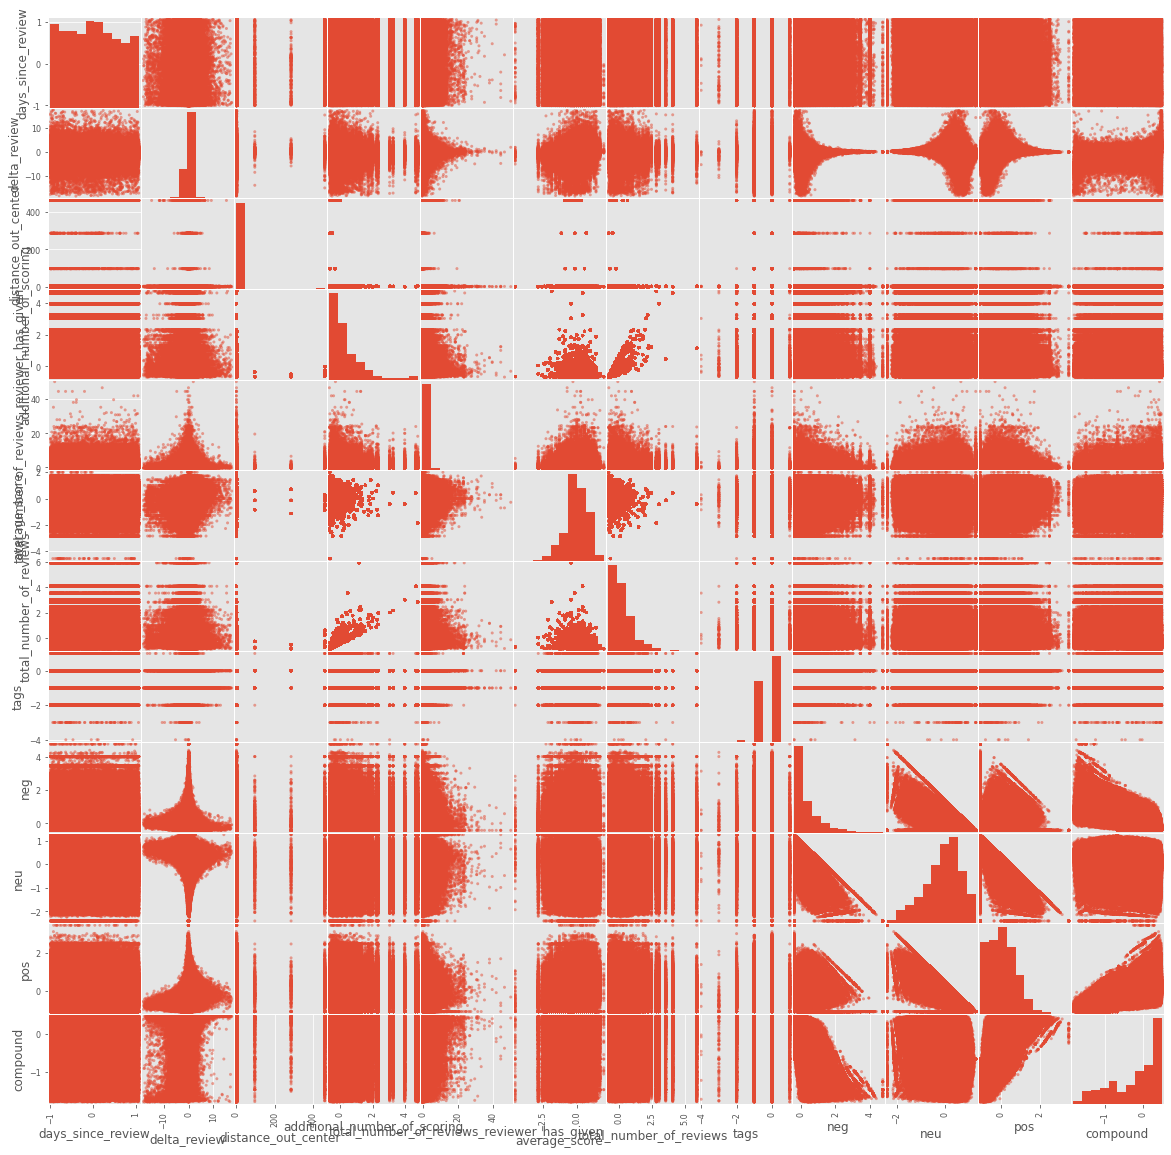

In [84]:
# Преобразуем промежуточный датасет в полноценный датафрейм для визуализации
df_r = pd.DataFrame(df_r, columns=col_names)
pd.plotting.scatter_matrix(df_r, alpha=0.5, figsize=(20,20));

После нормализации стандартизируем признаки

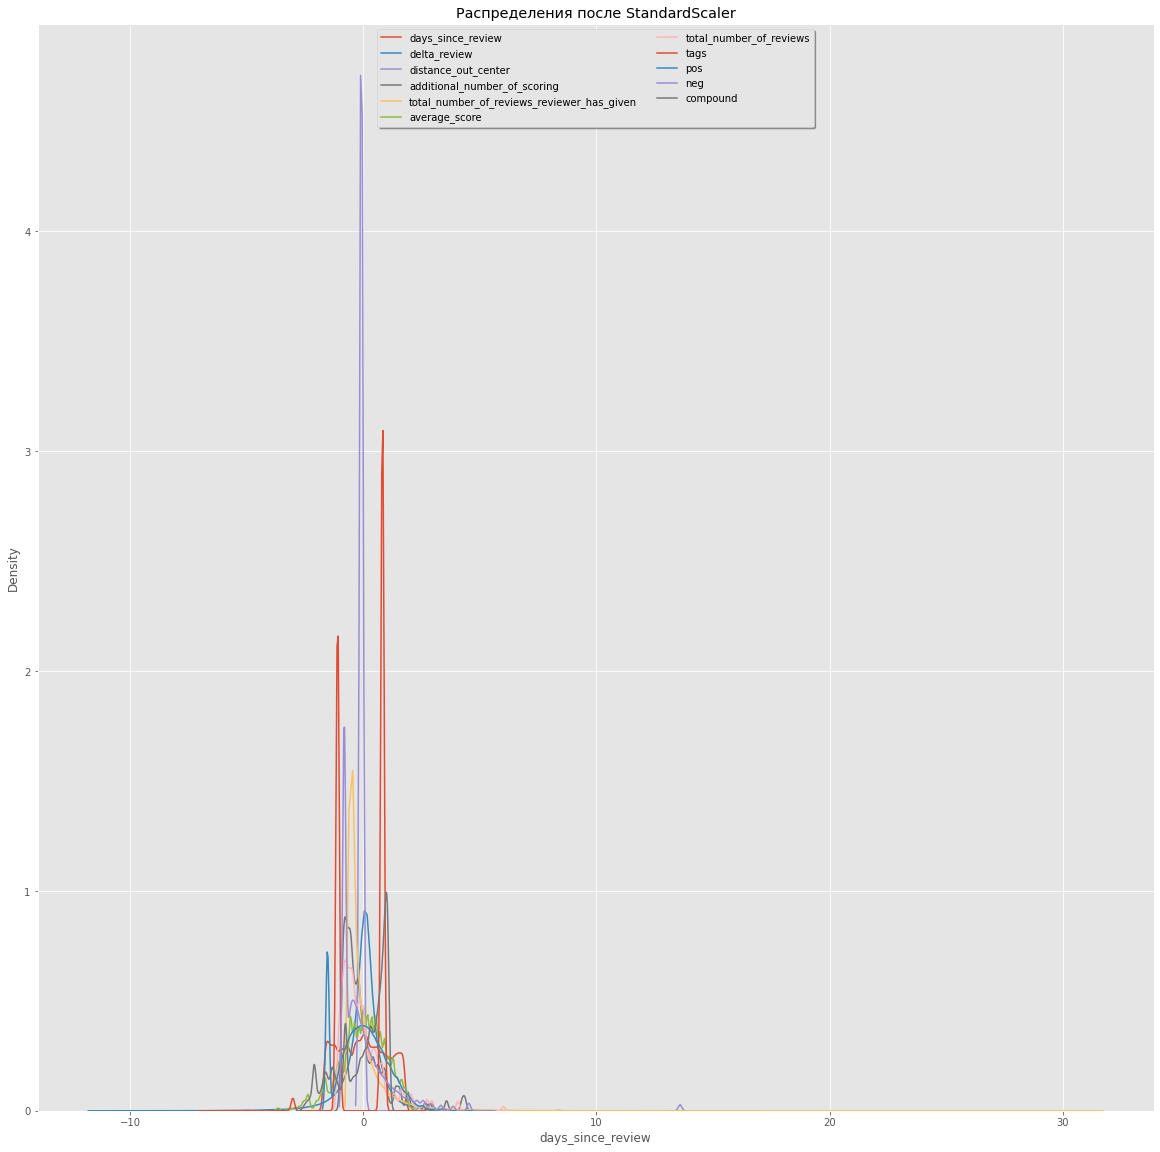

In [85]:
# инициализируем стандартизатор StandardScaler
s_scaler = preprocessing.StandardScaler()

# копируем исходный датасет
df_s = s_scaler.fit_transform(df_r)

# Преобразуем промежуточный датасет в полноценный датафрейм для визуализации
df_s = pd.DataFrame(df_s, columns=col_names)

fig, (ax1) = plt.subplots(ncols=1, figsize=(20,20))
ax1.set_title('Распределения после StandardScaler')

sns.kdeplot(df_s['days_since_review'], ax=ax1, label ='days_since_review')
sns.kdeplot(df_s['delta_review'], ax=ax1, label ='delta_review')
sns.kdeplot(df_s['distance_out_center'], ax=ax1, label ='distance_out_center')
sns.kdeplot(df_s['additional_number_of_scoring'], ax=ax1, label ='additional_number_of_scoring')
sns.kdeplot(df_s['total_number_of_reviews_reviewer_has_given'], ax=ax1, label ='total_number_of_reviews_reviewer_has_given')
sns.kdeplot(df_s['average_score'], ax=ax1, label ='average_score')
sns.kdeplot(df_s['total_number_of_reviews'], ax=ax1, label ='total_number_of_reviews')
sns.kdeplot(df_s['tags'], ax=ax1, label ='tags')
sns.kdeplot(df_s['pos'], ax=ax1, label ='pos')
sns.kdeplot(df_s['neg'], ax=ax1, label ='neg')
sns.kdeplot(df_s['compound'], ax=ax1, label ='compound')

plt.legend(loc='upper center', shadow=True, ncol=2)

Заменим столбцы в оригинальном датасете на стандартизированные

In [86]:
hotels['days_since_review'] = df_s['days_since_review']
hotels['delta_review'] = df_s['delta_review']
hotels['distance_out_center'] = df_s['distance_out_center']
hotels['additional_number_of_scoring'] = df_s['additional_number_of_scoring']
hotels['total_number_of_reviews_reviewer_has_given'] = df_s['total_number_of_reviews_reviewer_has_given']
hotels['average_score'] = df_s['average_score']
hotels['total_number_of_reviews'] = df_s['total_number_of_reviews']
hotels['tags'] = df_s['tags']
hotels['pos'] = df_s['pos']
hotels['neg'] = df_s['neg']
hotels['compound'] = df_s['compound']

# Анализ мультиколлинеарности

In [87]:
#функция для построения корреляционной диаграммы
def show_corr_heatmap(columns_list, title, method):
    """Построение корреляционной диаграммы"""
    fig_, ax_ = plt.subplots(figsize=(15, 12))
    corr = hotels[columns_list].corr(method=method)
    mask = np.triu(np.ones_like(corr, dtype=bool))
    sns.heatmap(corr, 
                annot=True, 
                linewidths=0.1, 
                ax=ax_, 
                mask=mask, 
                cmap='viridis',
                fmt='.1g')
    ax_.set_title(title, fontsize=18)
    plt.show()

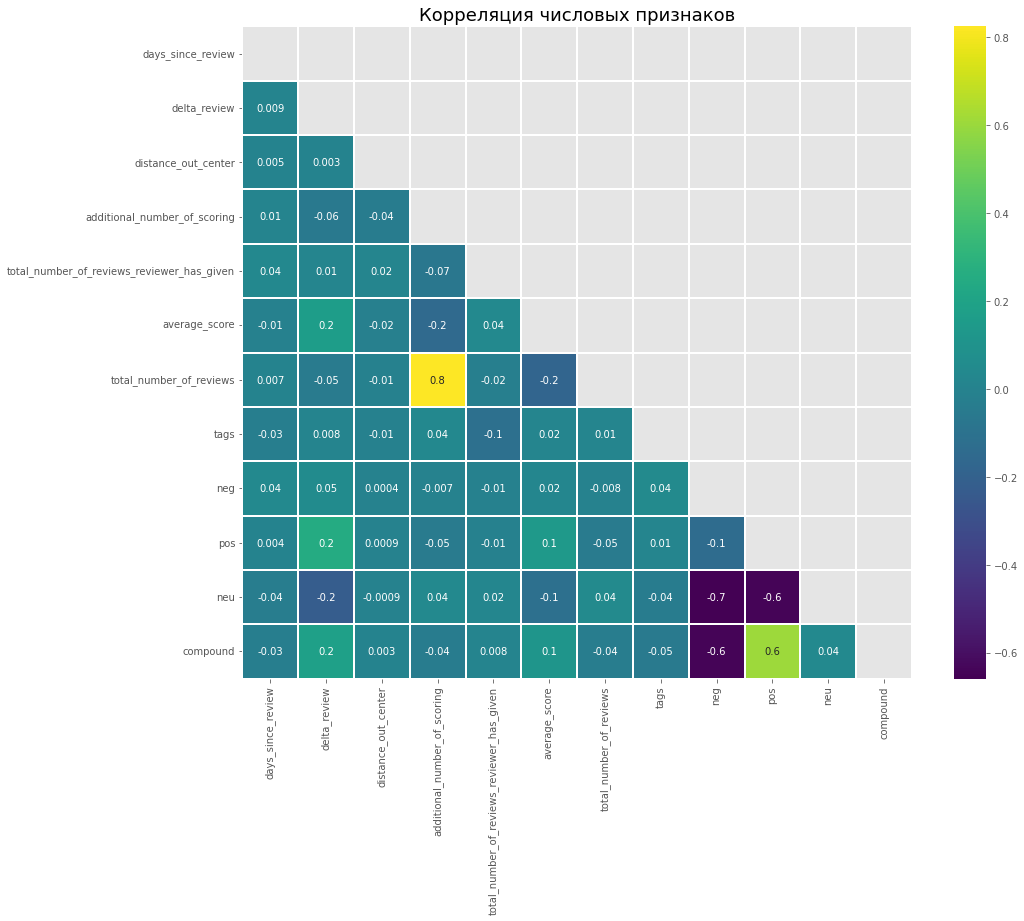

In [88]:
show_corr_heatmap(num_cols, 'Корреляция числовых признаков', method='pearson');

In [89]:
#выделим признаки с сильной корреляцией
drop_columns = ['total_number_of_reviews', 'neu']

In [90]:
# удалим выбранные столбцы:
hotels.drop(drop_columns, axis = 1, inplace=True)

Для анализа мультиколлинеарных признаков используем коэффициент корреляции Мэтьюса т.к. он может быть полезен в случае, когда в датасете представлены только бинарные переменные. У нас все категориальные переменные переведены в бинарный вид.

In [91]:
!pip install scikit-learn

In [92]:
from sklearn.metrics import matthews_corrcoef

In [93]:
for act in cat_cols:
    #define array of actual classes
    actual = hotels[act]
    for pred_col in cat_cols:
        #define array of predicted classes
        pred = hotels[pred_col]
        #calculate Matthews correlation coefficient
        corr_matt = matthews_corrcoef(actual, pred)
        if abs(corr_matt)>=0.7 and abs(corr_matt) != 1:
            print(f"Сильная корреляция по методу Мэтьюса найдена у признаков {act} и {pred_col} = {corr_matt}")

Категориальных признаков с сильной корреляцией не обнаружено

# Оценка значимости признака

Проведем оценку значимости признаков. Наш целевой признак относится к категории - количественный дискретный. 
Воспользуемся для оценки анализом ANOVA. 


In [94]:
from sklearn.feature_selection import f_classif # anova

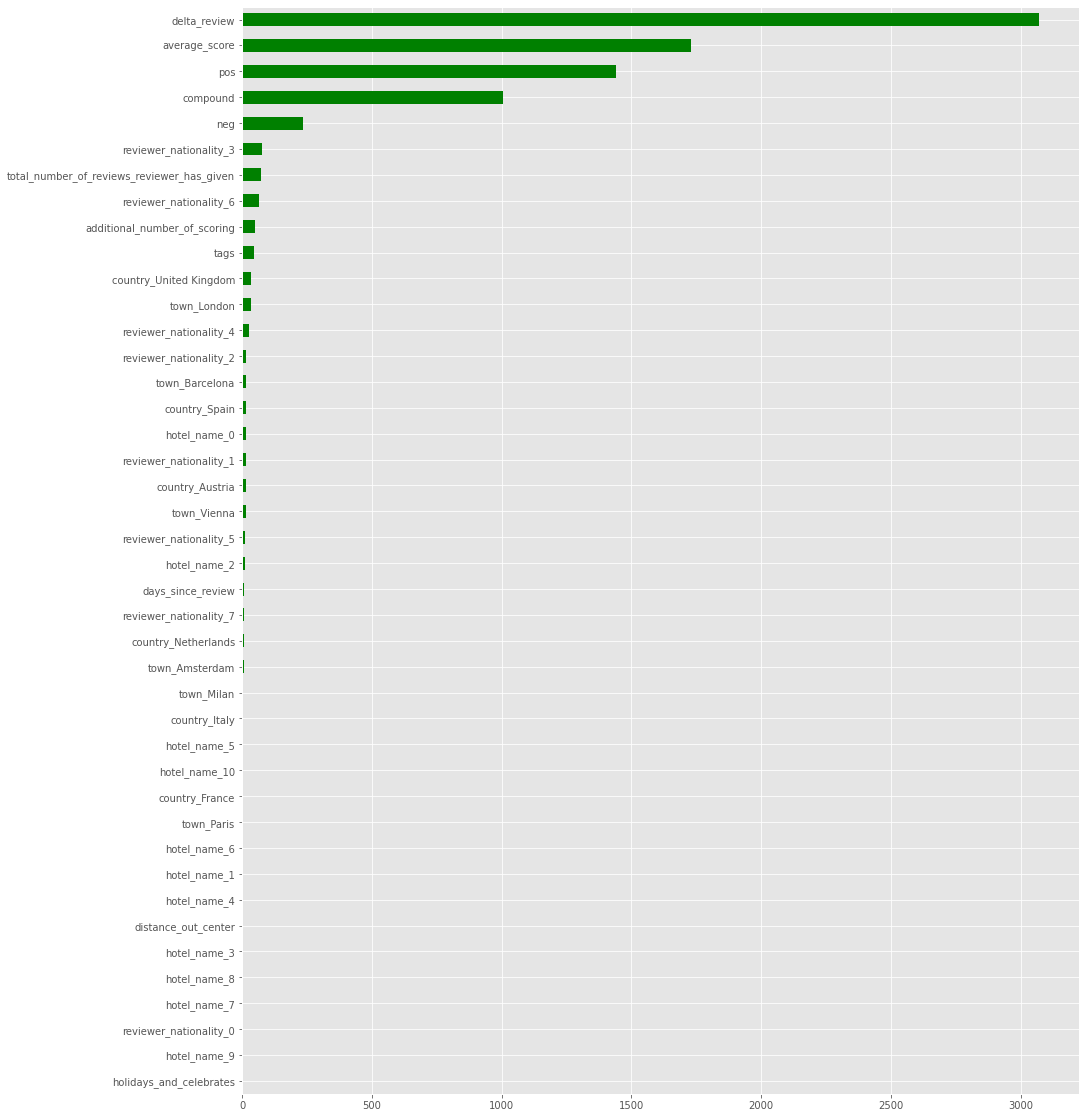

In [95]:
y = hotels.query('sample == 1').drop(['sample'], axis=1).reviewer_score.values
X = hotels.query('sample == 1').drop(['sample', 'reviewer_score'], axis=1)

# визуализируем результат анализа значимости:
imp_num = pd.Series(f_classif(X[X.columns], y)[0], index = X.columns)
imp_num.sort_values(inplace = True)

fig5, ax5 = plt.subplots(figsize=(15, 20))
imp_num.plot(kind = 'barh', color='green');


In [96]:
#данные признаки малополезны и подлежат удалению
drop_columns= ['country_Italy',
                'country_France', 
                'hotel_name_10',
                'hotel_name_5',
                'hotel_name_6', 
                'hotel_name_1',
                'hotel_name_4', 
                'hotel_name_3', 
                'hotel_name_8', 
                'hotel_name_7', 
                'hotel_name_9',
                'distance_out_center',
                'reviewer_nationality_0',
                'holidays_and_celebrates',
                'town_Paris',
                'town_Milan'
              ]
               

In [97]:
# удалим выбранные столбцы:
hotels.drop(drop_columns, axis = 1, inplace=True)

In [98]:
# Загружаем специальный инструмент для разбивки:  
from sklearn.model_selection import train_test_split  

In [99]:
# Теперь выделим тестовую часть
train_data = hotels.query('sample == 1').drop(['sample'], axis=1)
test_data = hotels.query('sample == 0').drop(['sample'], axis=1)

y = train_data.reviewer_score.values            # наш таргет
X = train_data.drop(['reviewer_score'], axis=1)

In [100]:
# Воспользуемся специальной функцие train_test_split для разбивки тестовых данных
# выделим 20% данных на валидацию (параметр test_size)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

In [101]:
# проверяем
test_data.shape, train_data.shape, X.shape, X_train.shape, X_test.shape

((128935, 27), (386803, 27), (386803, 26), (309442, 26), (77361, 26))

In [102]:
# Импортируем необходимые библиотеки:
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели
from sklearn import metrics # инструменты для оценки точности модели

In [103]:
# Создаём модель
model = RandomForestRegressor(n_estimators=100, verbose=1, n_jobs=-1, random_state=RANDOM_SEED)

In [104]:
# Обучаем модель на тестовом наборе данных
model.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   43.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.7min finished


RandomForestRegressor(n_jobs=-1, random_state=42, verbose=1)

In [105]:
# Используем обученную модель для предсказания рейтинга отеля в тестовой выборке.
# Предсказанные значения записываем в переменную y_pred
y_pred = model.predict(X_test)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.6s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    1.4s finished


In [106]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются
# Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение предсказанных значений от фактических.
print('MAPE:', metrics.mean_absolute_error(y_test, y_pred))

MAPE: 0.8895361485823111


<AxesSubplot:>

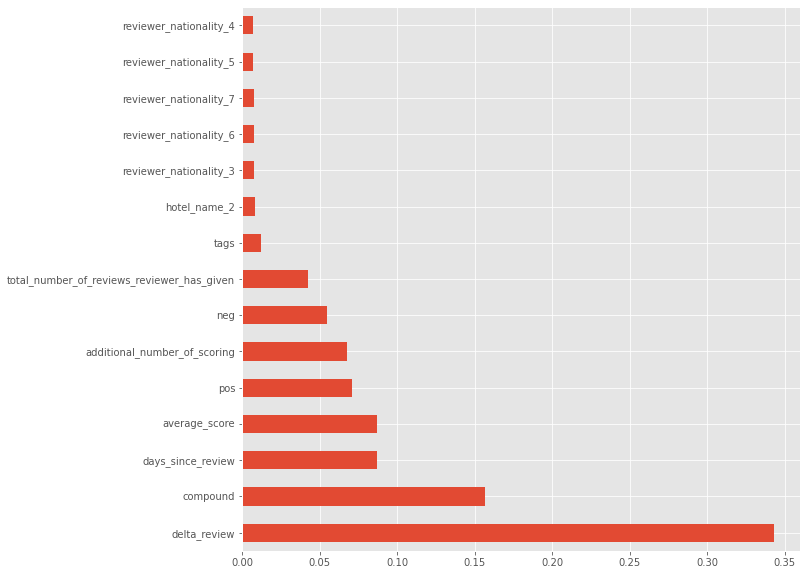

In [107]:
# в RandomForestRegressor есть возможность вывести самые важные признаки для модели
plt.rcParams['figure.figsize'] = (10,10)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')

In [108]:
test_data.sample(10)

,additional_number_of_scoring,average_score,total_number_of_reviews_reviewer_has_given,tags,days_since_review,reviewer_score,country_Austria,country_Netherlands,country_Spain,country_United Kingdom,...,hotel_name_0,hotel_name_2,delta_review,town_Amsterdam,town_Barcelona,town_London,town_Vienna,neg,pos,compound
181571,0.950813,1.099381,-0.105614,-1.094529,0.227629,0.0,0,0,0,1,...,0,0,0.425800,0,0,1,0,-0.041148,1.208505,0.676409
3529,-0.643471,0.734449,-0.558504,-1.094529,0.926435,0.0,0,0,0,0,...,0,1,0.108534,0,0,0,0,-0.566700,1.684054,1.029781
105075,-0.128026,0.369517,-0.558504,0.827860,-1.696479,0.0,0,0,1,0,...,0,0,0.223903,0,1,0,0,1.172627,1.538219,0.213325
200171,-0.116039,-0.725278,3.426925,-1.094529,-0.906733,0.0,0,0,0,1,...,0,0,0.050849,0,0,1,0,-0.816963,0.035485,0.567448
186258,-0.287854,-0.177880,-0.377348,0.827860,0.347288,0.0,0,0,0,1,...,0,0,0.223903,0,0,1,0,-0.816963,1.151440,0.473704
188794,0.902865,0.369517,-0.558504,-1.094529,0.040962,0.0,0,0,0,1,...,0,0,0.195061,0,0,1,0,-0.816963,-0.104009,0.063034
204509,-0.054105,-0.907744,-0.558504,0.827860,0.198911,0.0,0,0,0,1,...,0,0,-2.862229,0,0,1,0,-0.466595,-1.086810,0.515410
174966,0.143682,1.646779,-0.196192,-1.094529,-1.045537,0.0,0,0,0,1,...,0,0,-0.093363,0,0,1,0,-0.816963,1.988405,1.077122
481035,-0.543579,-0.177880,-0.377348,0.827860,1.754471,0.0,1,0,0,0,...,0,1,0.425800,0,0,0,1,0.528200,1.367022,0.678288
489,-0.547575,0.369517,0.528432,-1.094529,-1.284854,0.0,0,0,0,0,...,0,0,0.685381,0,0,0,0,0.459378,-0.871228,-1.594111


In [109]:
test_data = test_data.drop(['reviewer_score'], axis=1)

In [110]:
sample_submission

,reviewer_score,id
0,1,488440
1,10,274649
2,3,374688
3,10,404352
4,9,451596
...,...,...
128930,7,495812
128931,1,315577
128932,3,511968
128933,6,303386


In [111]:
predict_submission = model.predict(test_data)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    1.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    2.2s finished


In [112]:
predict_submission

array([8.741, 9.687, 9.456, ..., 9.482, 8.594, 8.047])

In [113]:
list(sample_submission)

['reviewer_score', 'id']

In [114]:
sample_submission['reviewer_score'] = predict_submission
sample_submission.to_csv('submission.csv', index=False)
sample_submission.head(10)

,reviewer_score,id
0,8.741,488440
1,9.687,274649
2,9.456,374688
3,8.769,404352
4,8.027,451596
5,9.552,302161
6,9.633,317079
7,8.639,13963
8,9.035,159785
9,8.604,195089
